In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly as plty
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans,DBSCAN
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel(r"C:\Users\USER\Documents\EastWestAirlines datas 1.xlsx")

In [3]:
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

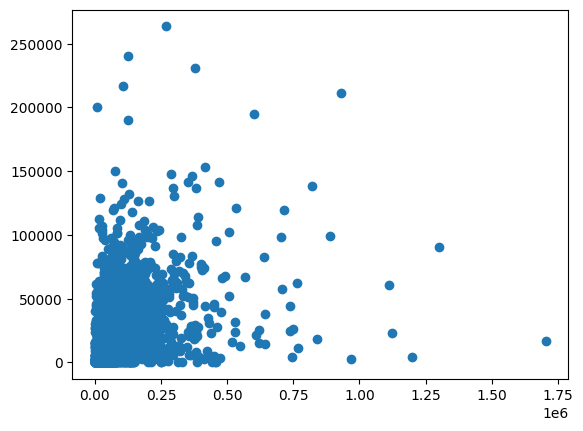

In [4]:
plt.scatter(df["Balance"],df["Bonus_miles"])

In [172]:
df.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1                  0                0               7000       0   
1            2                  0                0               6968       0   
2            4                  0                0               7034       0   
3            1                  0                0               6952       0   
4           26               2077                4               6935       1   

   clusters  clusterss  
0         0          1  
1         0          1  
2         0          1  
3         0          1  
4         1          0

In [173]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?', 'clusters', 'clusterss'],
      dtype='object')

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
 12  clusters           3999 non-null   int64
 13  clusterss          3999 non-null   int32
dtypes: int32(1), int64(13)
memory usage: 421.9 KB


In [175]:
df.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?     clusters  \
count      3999.000000         3999.00000  3999.000000  3999.000000   
mean          1.373593         4118.55939     0.370343     0.274819   
std           3.793172         2065.13454     0.482957     0.570882   
min           0.000000            2.00000     0.000000    -1.000000   
25%           0.000000         2330.00000     0.000000     0.000000   
50%           0.000000         4096.00000     0.000000     0.000000   
75%           1.000000         5790.50000     1.000000     1.000000   
max          53.000000         8296.00000     1.000000     2.000000   

         clusterss  
count  3999.000000  
mean      0.676919  
std       0.467712  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

In [176]:
df.value_counts()

ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  clusters  clusterss
4021  3016     0           1          1          1          0            0            0                  0                1398               0       0         1            1
1     28143    0           1          1          1          174          1            0                  0                7000               0       0         1            1
2     19244    0           1          1          1          215          2            0                  0                6968               0       0         1            1
3     41354    0           1          1          1          4123         4            0                  0                7034               0       0         1            1
4     14776    0           1          1          1          500          1            0                  0                6952         

In [177]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
clusters             0
clusterss            0
dtype: int64

In [178]:
df.duplicated().sum()

np.int64(0)

<Axes: >

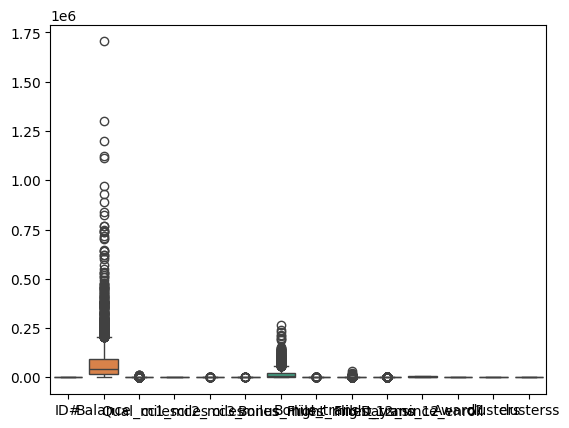

In [179]:
sns.boxplot(df)

In [183]:
def outlier_capping(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower_extream=q1-1.5*iqr 
    upper_extream=q3+1.5*iqr
    df[column]=df[column].apply(lambda x:lower_extream if x<lower_extream else upper_extream if x>upper_extream else x )
for col in df.select_dtypes(["int","float"]).columns:
    outlier_capping(df,col)

<Axes: >

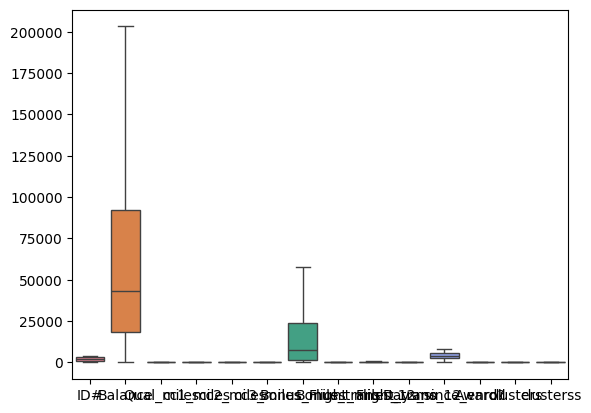

In [184]:
sns.boxplot(df)

In [185]:
num_cols=[i for i in df.columns if df[i].dtypes!="O"]

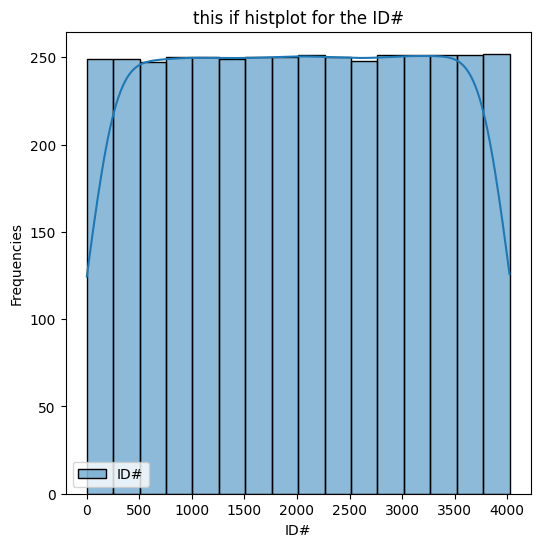

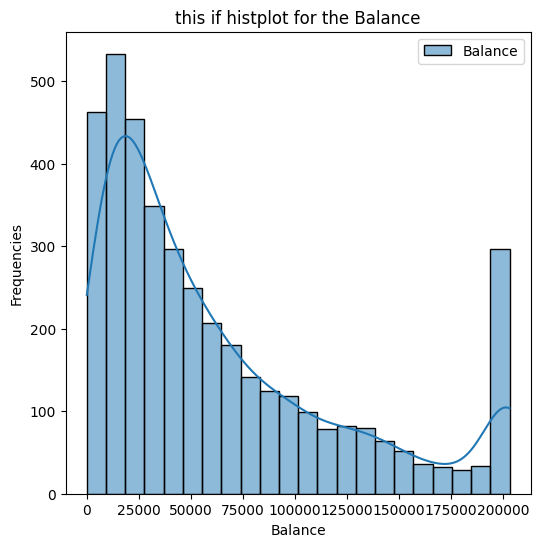

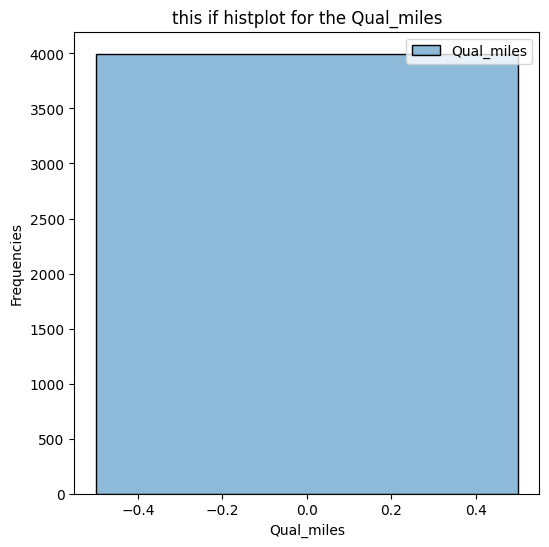

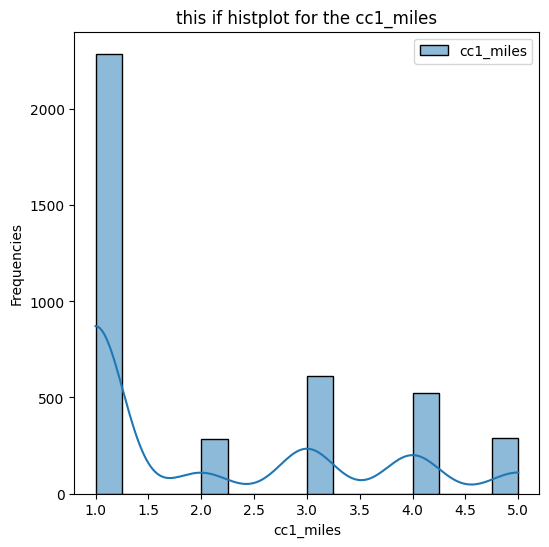

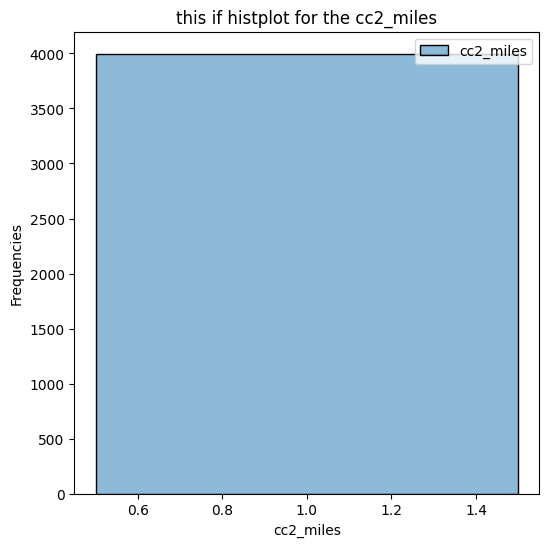

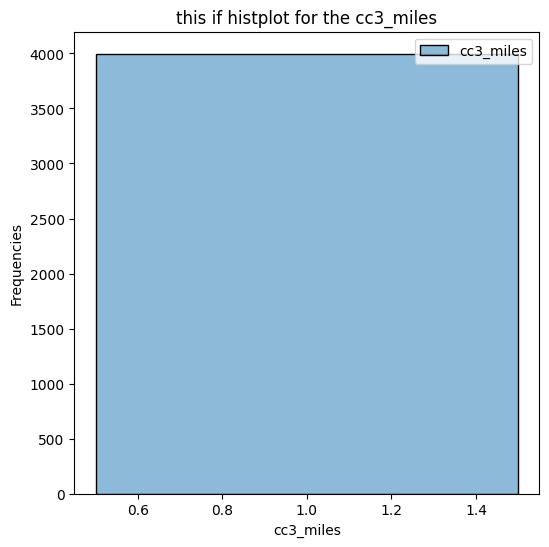

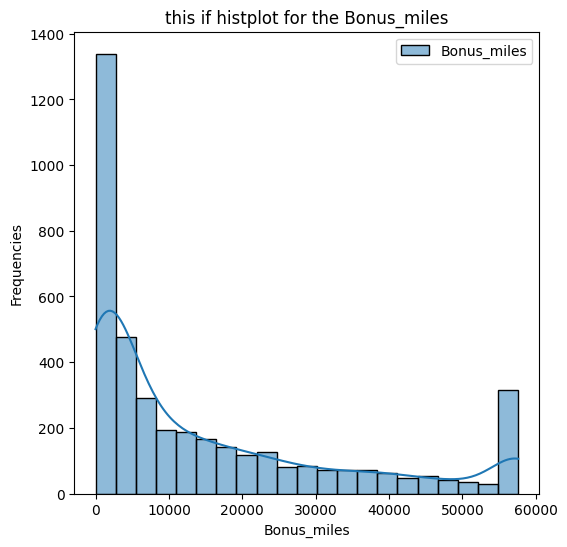

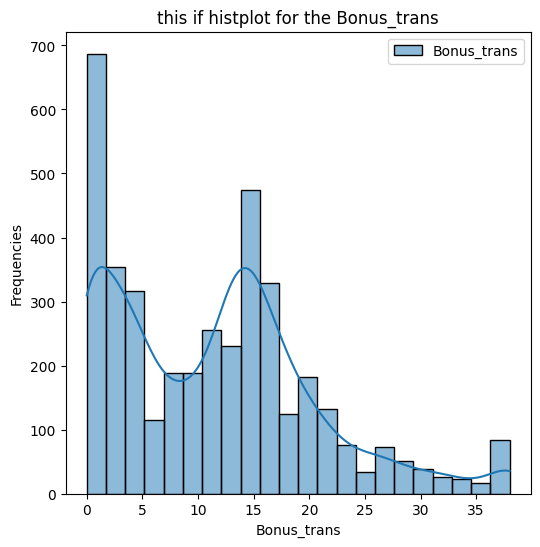

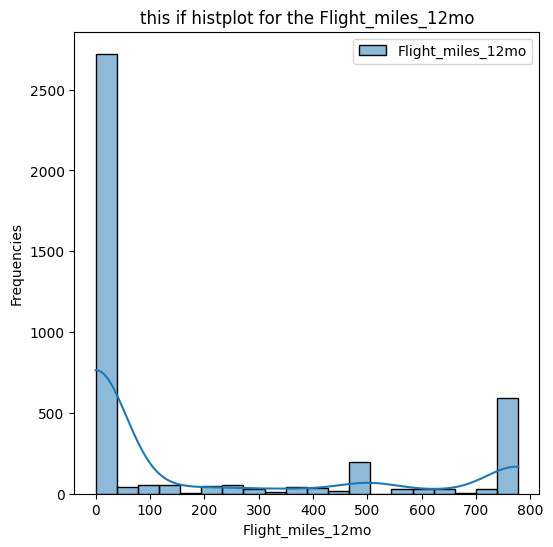

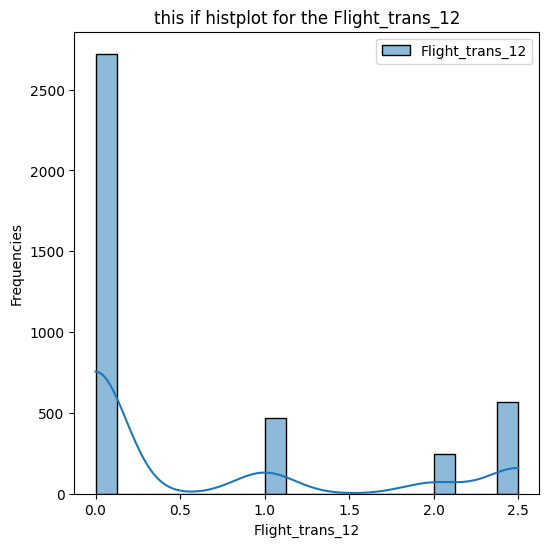

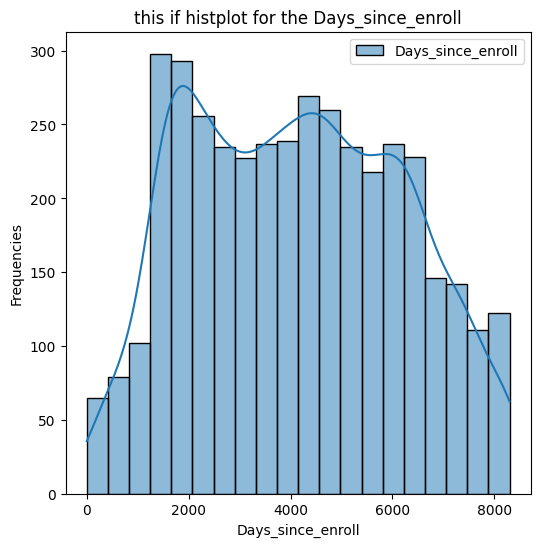

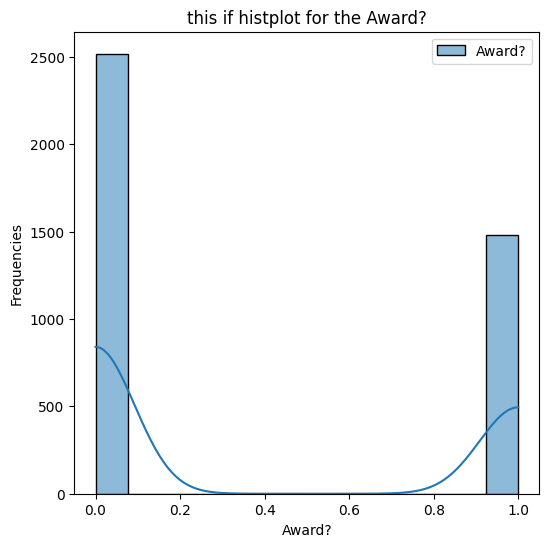

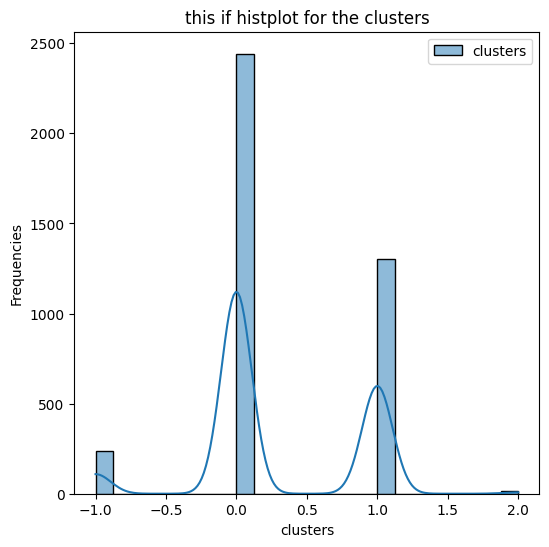

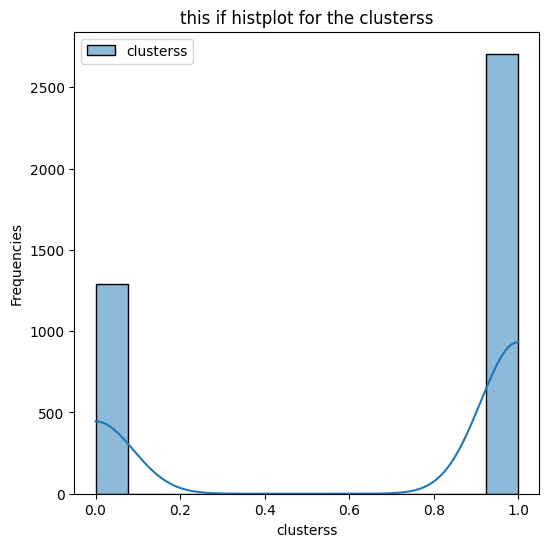

In [191]:
for col in num_cols:
    plt.figure(figsize=(6,6))
    plt.tight_layout()
    sns.histplot(df[col],kde=True,label=col)
    plt.xlabel(col)
    plt.ylabel("Frequencies")
    plt.title(f"this if histplot for the {col}")
    plt.legend()
    plt.show()

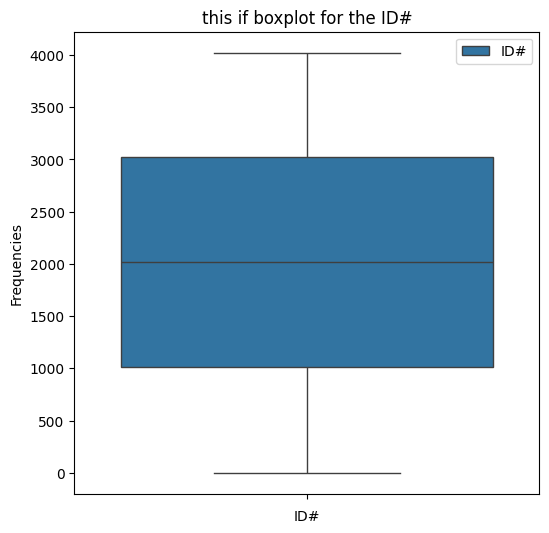

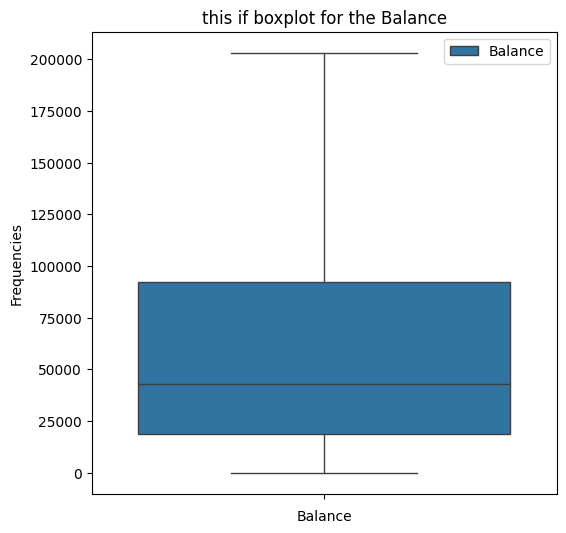

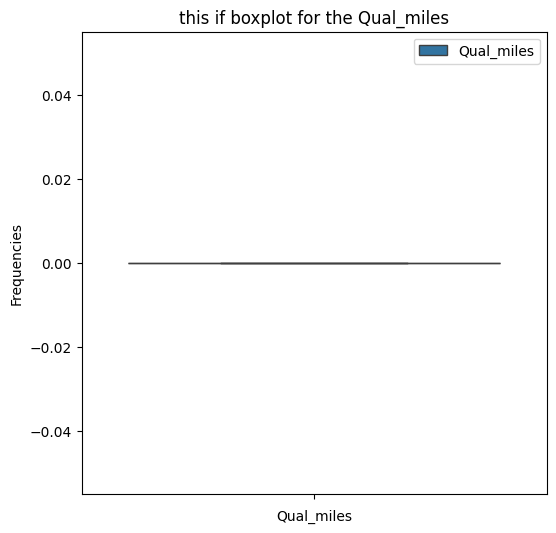

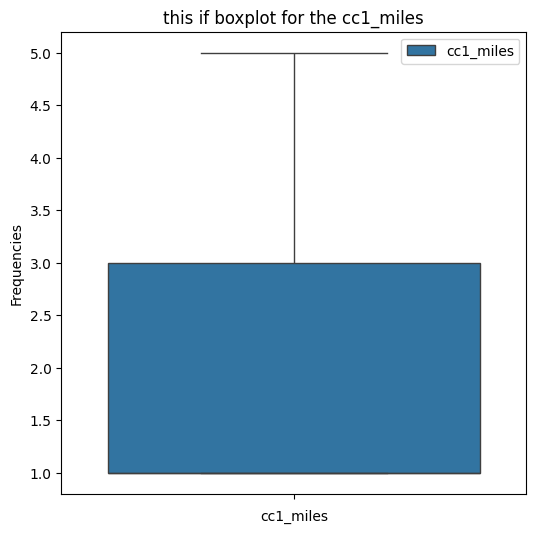

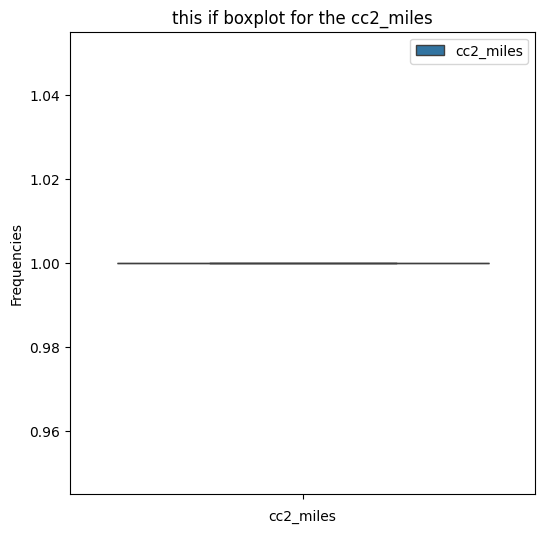

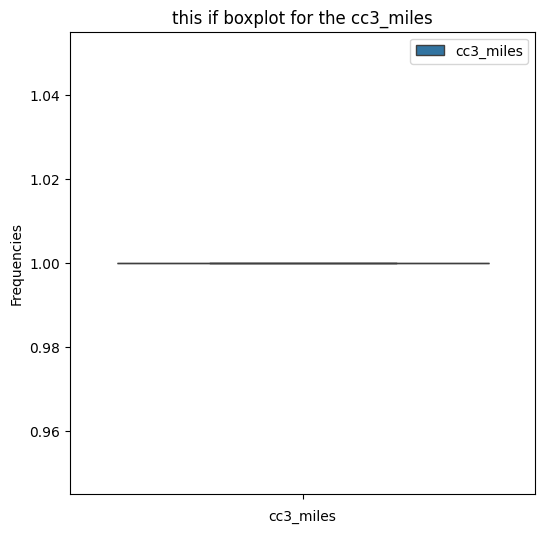

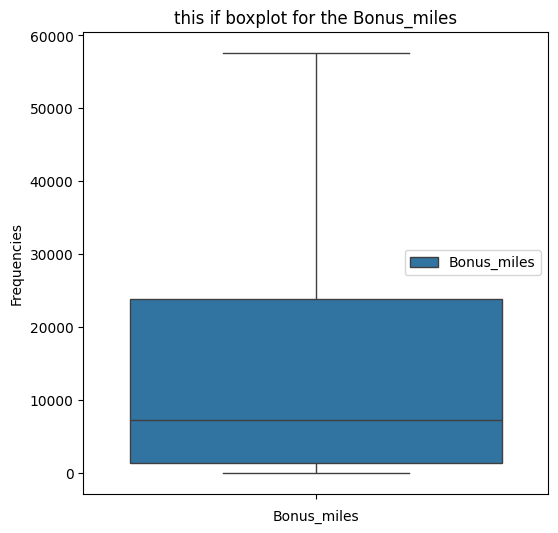

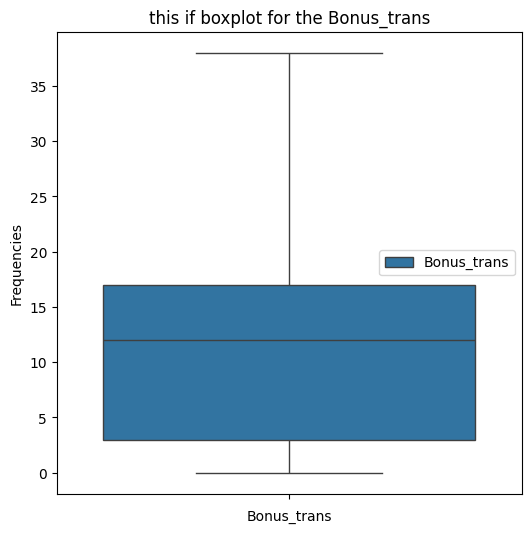

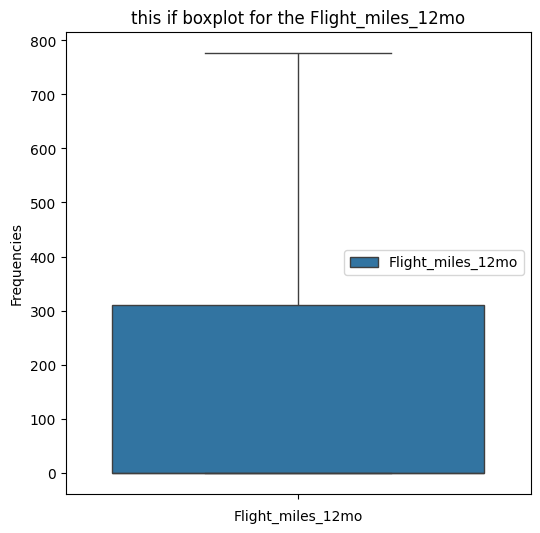

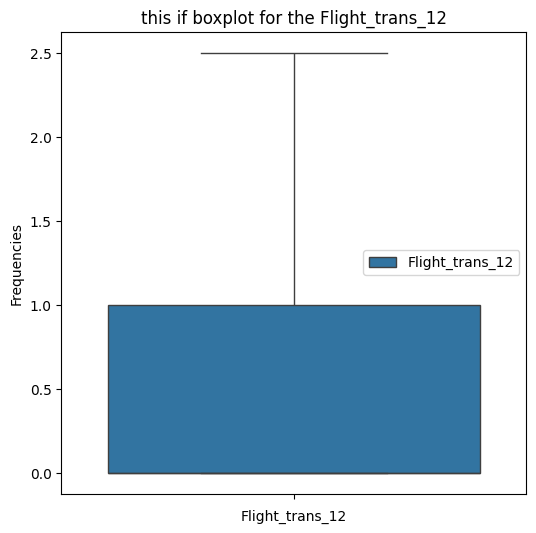

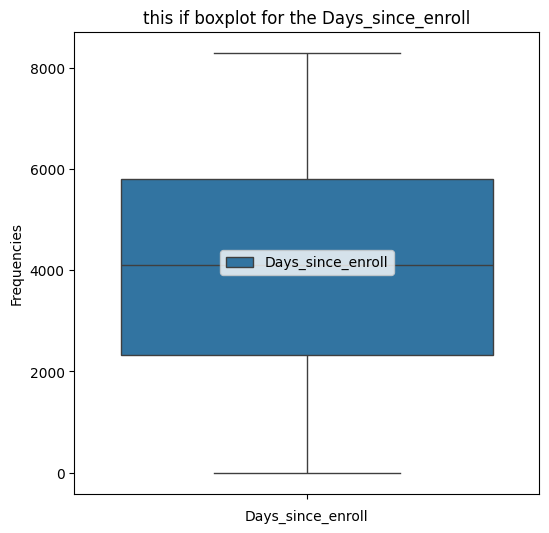

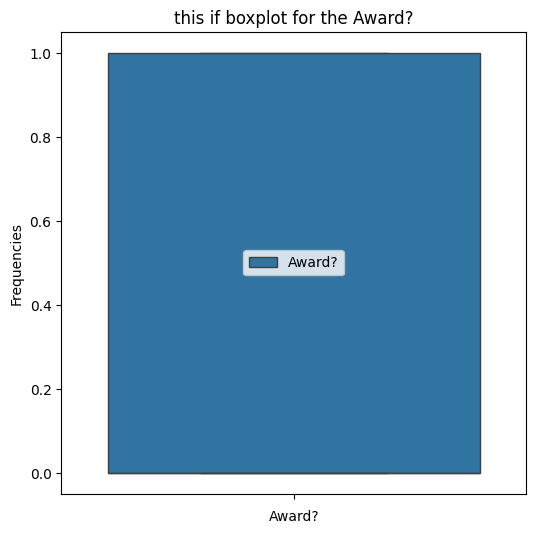

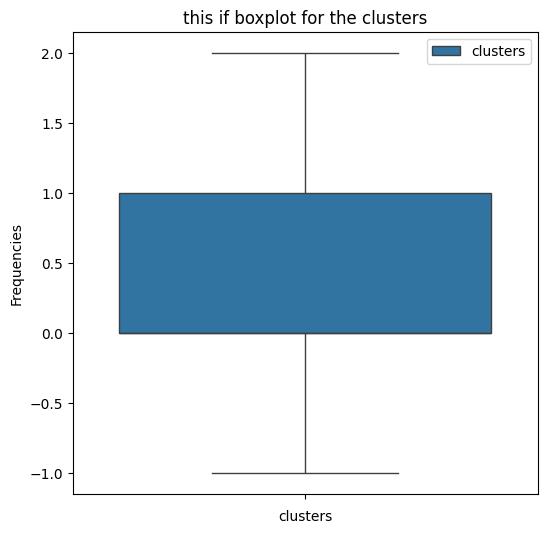

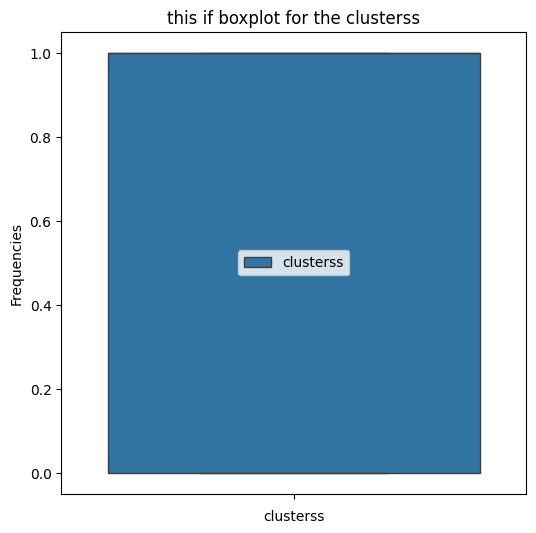

In [198]:
for col in num_cols:
    plt.figure(figsize=(6,6))
    plt.tight_layout()
    sns.boxplot(df[col],label=col)
    plt.xlabel(col)
    plt.ylabel("Frequencies")
    plt.title(f"this if boxplot for the {col}")
    plt.legend()
    plt.show()

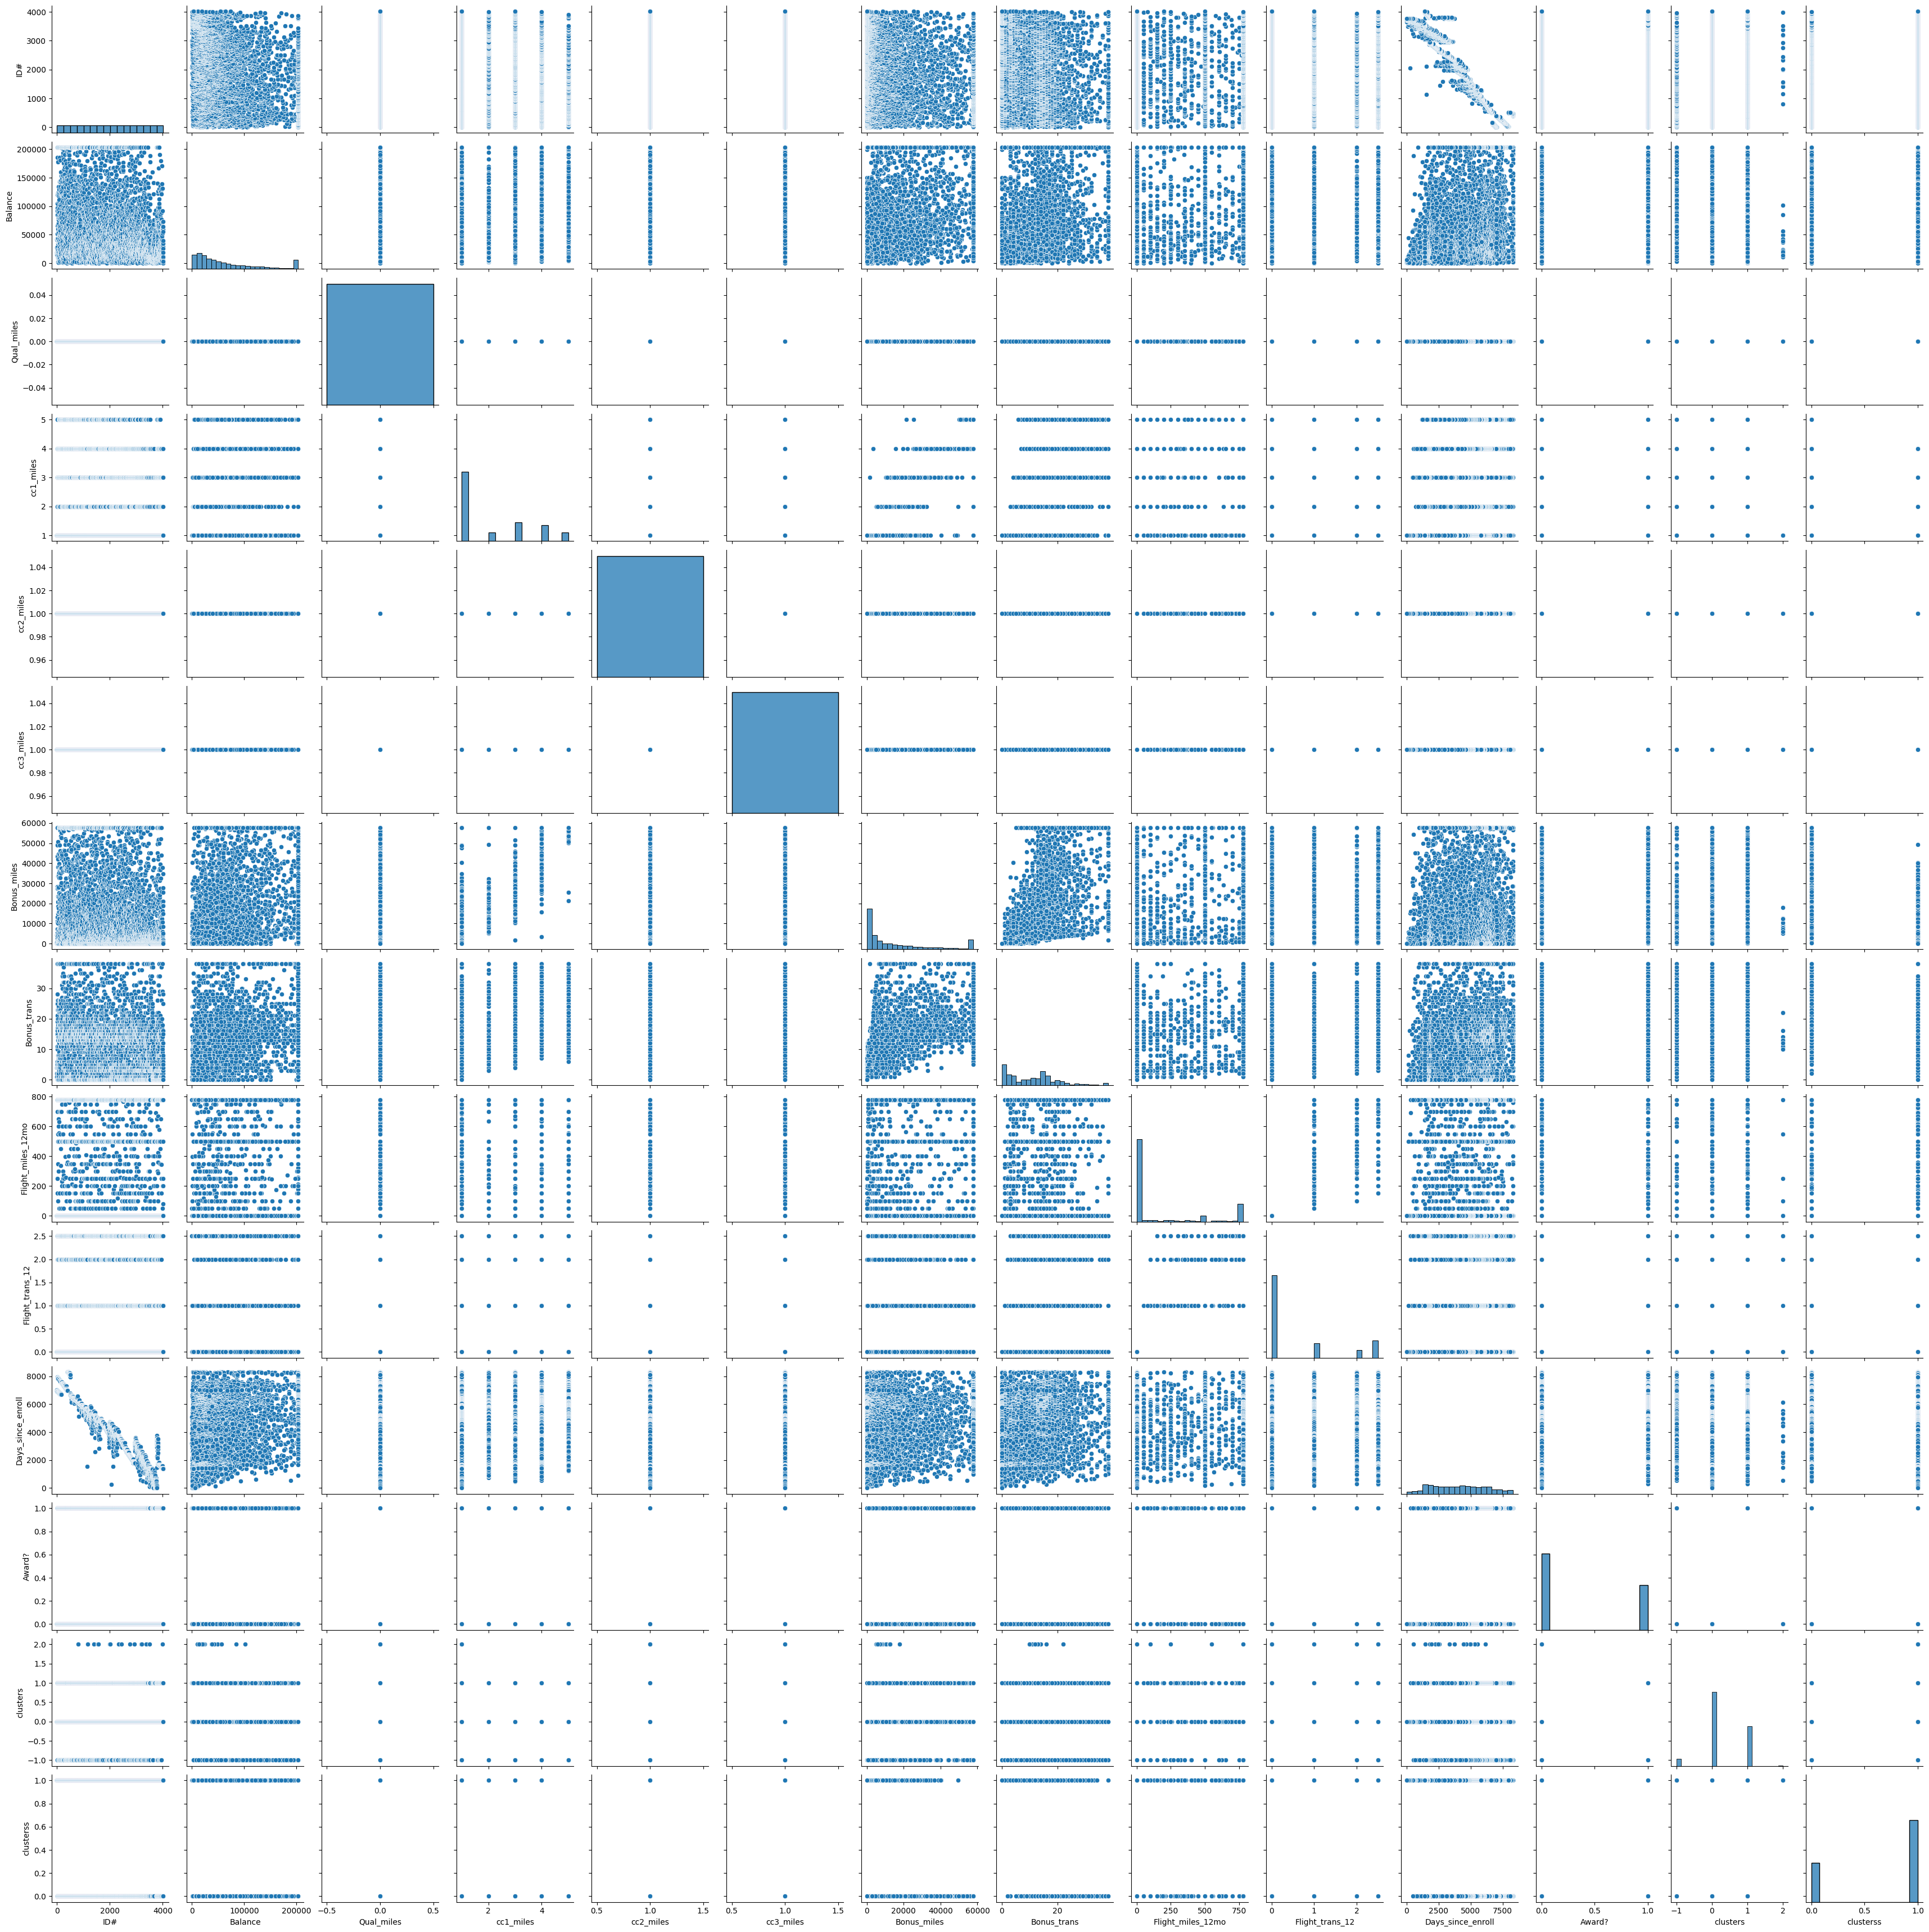

In [199]:
sns.pairplot(df)

In [200]:
cor=df.corr()

In [201]:
cor

ID#   Balance  Qual_miles  cc1_miles  cc2_miles  \
ID#                1.000000 -0.269374         NaN  -0.224465        NaN   
Balance           -0.269374  1.000000         NaN   0.446510        NaN   
Qual_miles              NaN       NaN         NaN        NaN        NaN   
cc1_miles         -0.224465  0.446510         NaN   1.000000        NaN   
cc2_miles               NaN       NaN         NaN        NaN        NaN   
cc3_miles               NaN       NaN         NaN        NaN        NaN   
Bonus_miles       -0.210868  0.494422         NaN   0.912531        NaN   
Bonus_trans       -0.156118  0.409017         NaN   0.627786        NaN   
Flight_miles_12mo -0.083917  0.297045         NaN   0.098786        NaN   
Flight_trans_12   -0.082887  0.295565         NaN   0.087618        NaN   
Days_since_enroll -0.964988  0.286143         NaN   0.230849        NaN   
Award?            -0.177901  0.170678         NaN   0.335457        NaN   
clusters          -0.083602 -0.071751         NaN   0.182200        NaN   
clusterss          0.263555 -0.484469         NaN  -0.783040        NaN   

                   cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
ID#                      NaN    -0.210868    -0.156118          -0.083917   
Balance                  NaN     0.494422     0.409017           0.297045   
Qual_miles               NaN          NaN          NaN                NaN   
cc1_miles                NaN     0.912531     0.627786           0.098786   
cc2_miles                NaN          NaN          NaN                NaN   
cc3_miles                NaN          NaN          NaN                NaN   
Bonus_miles              NaN     1.000000     0.663558           0.205801   
Bonus_trans              NaN     0.663558     1.000000           0.310543   
Flight_miles_12mo        NaN     0.205801     0.310543           1.000000   
Flight_trans_12          NaN     0.193669     0.308518           0.942734   
Days_since_enroll        NaN     0.217320     0.170308           0.095019   
Award?                   NaN     0.394061     0.337444           0.293119   
clusters                 NaN     0.143750     0.024793          -0.009691   
clusterss                NaN    -0.797097    -0.648244          -0.285504   

                   Flight_trans_12  Days_since_enroll    Award?  clusters  \
ID#                      -0.082887          -0.964988 -0.177901 -0.083602   
Balance                   0.295565           0.286143  0.170678 -0.071751   
Qual_miles                     NaN                NaN       NaN       NaN   
cc1_miles                 0.087618           0.230849  0.335457  0.182200   
cc2_miles                      NaN                NaN       NaN       NaN   
cc3_miles                      NaN                NaN       NaN       NaN   
Bonus_miles               0.193669           0.217320  0.394061  0.143750   
Bonus_trans               0.308518           0.170308  0.337444  0.024793   
Flight_miles_12mo         0.942734           0.095019  0.293119 -0.009691   
Flight_trans_12           1.000000           0.091898  0.300085 -0.003517   
Days_since_enroll         0.091898           1.000000  0.188121  0.083904   
Award?                    0.300085           0.188121  1.000000  0.653177   
clusters                 -0.003517           0.083904  0.653177  1.000000   
clusterss                -0.274942          -0.276438 -0.484469 -0.183545   

                   clusterss  
ID#                 0.263555  
Balance            -0.484469  
Qual_miles               NaN  
cc1_miles          -0.783040  
cc2_miles                NaN  
cc3_miles                NaN  
Bonus_miles        -0.797097  
Bonus_trans        -0.648244  
Flight_miles_12mo  -0.285504  
Flight_trans_12    -0.274942  
Days_since_enroll  -0.276438  
Award?             -0.484469  
clusters           -0.183545  
clusterss           1.000000

<Axes: >

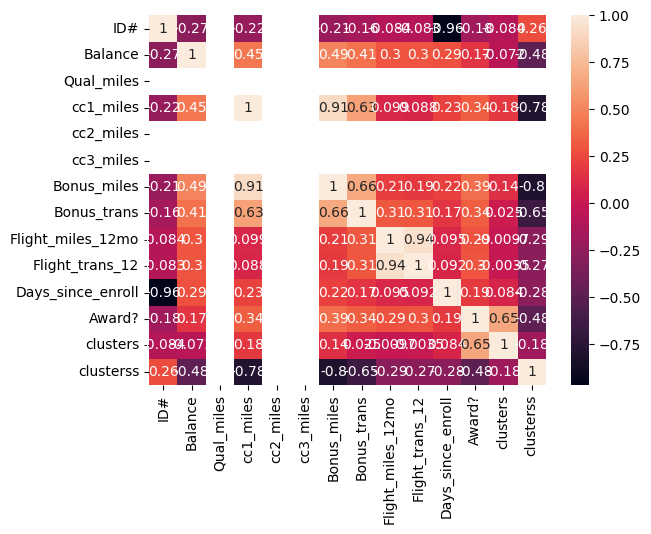

In [202]:
sns.heatmap(cor,annot=True)

In [203]:
features=pd.DataFrame(df.drop(columns="ID#"))

In [204]:
features

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     28143.0         0.0          1        1.0        1.0        174.0   
1     19244.0         0.0          1        1.0        1.0        215.0   
2     41354.0         0.0          1        1.0        1.0       4123.0   
3     14776.0         0.0          1        1.0        1.0        500.0   
4     97752.0         0.0          4        1.0        1.0      43300.0   
...       ...         ...        ...        ...        ...          ...   
3994  18476.0         0.0          1        1.0        1.0       8525.0   
3995  64385.0         0.0          1        1.0        1.0        981.0   
3996  73597.0         0.0          3        1.0        1.0      25447.0   
3997  54899.0         0.0          1        1.0        1.0        500.0   
3998   3016.0         0.0          1        1.0        1.0          0.0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0             1.0                0.0              0.0               7000   
1             2.0                0.0              0.0               6968   
2             4.0                0.0              0.0               7034   
3             1.0                0.0              0.0               6952   
4            26.0              777.5              2.5               6935   
...           ...                ...              ...                ...   
3994          4.0              200.0              1.0               1403   
3995          5.0                0.0              0.0               1395   
3996          8.0                0.0              0.0               1402   
3997          1.0              500.0              1.0               1401   
3998          0.0                0.0              0.0               1398   

      Award?  clusters  clusterss  
0          0         0          1  
1          0         0          1  
2          0         0          1  
3          0         0          1  
4          1         1          0  
...      ...       ...        ...  
3994       1         1          1  
3995       1         1          1  
3996       1         1          1  
3997       0         0          1  
3998       0         0          1  

[3999 rows x 13 columns]

In [205]:
fea_scales=StandardScaler()

In [206]:
featss=pd.DataFrame(fea_scales.fit_transform(features))

In [207]:
featss

0    1         2    3    4         5         6         7   \
0    -0.607258  0.0 -0.769578  0.0  0.0 -0.843091 -1.148854 -0.604313   
1    -0.758947  0.0 -0.769578  0.0  0.0 -0.840822 -1.039133 -0.604313   
2    -0.382070  0.0 -0.769578  0.0  0.0 -0.624581 -0.819689 -0.604313   
3    -0.835106  0.0 -0.769578  0.0  0.0 -0.825052 -1.148854 -0.604313   
4     0.579265  0.0  1.409471  0.0  0.0  1.543191  1.594189  2.034489   
...        ...  ...       ...  ...  ...       ...       ...       ...   
3994 -0.772038  0.0 -0.769578  0.0  0.0 -0.381007 -0.819689  0.074478   
3995  0.010506  0.0 -0.769578  0.0  0.0 -0.798437 -0.709967 -0.604313   
3996  0.167530  0.0  0.683121  0.0  0.0  0.555335 -0.380802 -0.604313   
3997 -0.151188  0.0 -0.769578  0.0  0.0 -0.825052 -1.148854  1.092666   
3998 -1.035562  0.0 -0.769578  0.0  0.0 -0.852718 -1.258576 -0.604313   

            8         9         10        11        12  
0    -0.626143  1.395454 -0.766919 -0.481453  0.690855  
1    -0.626143  1.379957 -0.766919 -0.481453  0.690855  
2    -0.626143  1.411920 -0.766919 -0.481453  0.690855  
3    -0.626143  1.372208 -0.766919 -0.481453  0.690855  
4     2.020176  1.363975  1.303918  1.270441 -1.447481  
...        ...       ...       ...       ...       ...  
3994  0.432384 -1.315120  1.303918  1.270441  0.690855  
3995 -0.626143 -1.318994  1.303918  1.270441  0.690855  
3996 -0.626143 -1.315604  1.303918  1.270441  0.690855  
3997  0.432384 -1.316088 -0.766919 -0.481453  0.690855  
3998 -0.626143 -1.317541 -0.766919 -0.481453  0.690855  

[3999 rows x 13 columns]

In [278]:
dbscan=DBSCAN(eps=2.0,min_samples=10,metric="euclidean")

In [279]:
dbscan

DBSCAN(eps=2.0, min_samples=10)

In [280]:
clusters=dbscan.fit_predict(featss)

In [281]:
clusters

array([0, 0, 0, ..., 3, 0, 0], shape=(3999,))

In [282]:
df["clusters"]= clusters

In [283]:
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1  28143.0         0.0          1        1.0        1.0        174.0   
1        2  19244.0         0.0          1        1.0        1.0        215.0   
2        3  41354.0         0.0          1        1.0        1.0       4123.0   
3        4  14776.0         0.0          1        1.0        1.0        500.0   
4        5  97752.0         0.0          4        1.0        1.0      43300.0   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017  18476.0         0.0          1        1.0        1.0       8525.0   
3995  4018  64385.0         0.0          1        1.0        1.0        981.0   
3996  4019  73597.0         0.0          3        1.0        1.0      25447.0   
3997  4020  54899.0         0.0          1        1.0        1.0        500.0   
3998  4021   3016.0         0.0          1        1.0        1.0          0.0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0             1.0                0.0              0.0               7000   
1             2.0                0.0              0.0               6968   
2             4.0                0.0              0.0               7034   
3             1.0                0.0              0.0               6952   
4            26.0              777.5              2.5               6935   
...           ...                ...              ...                ...   
3994          4.0              200.0              1.0               1403   
3995          5.0                0.0              0.0               1395   
3996          8.0                0.0              0.0               1402   
3997          1.0              500.0              1.0               1401   
3998          0.0                0.0              0.0               1398   

      Award?  clusters  clusterss  
0          0         0          1  
1          0         0          1  
2          0         0          1  
3          0         0          1  
4          1         1          0  
...      ...       ...        ...  
3994       1         3          1  
3995       1         3          1  
3996       1         3          1  
3997       0         0          1  
3998       0         0          1  

[3999 rows x 14 columns]

In [284]:
n_clusters=len(set(clusters))-(1 if -1 in clusters else 0)

In [285]:
n_clusters

6

In [286]:
n_noise=list(clusters).count(-1)

In [287]:
n_noise

60

In [288]:
if n_clusters>1:
    sil_scores_db=silhouette_score(featss,clusters)

In [289]:
sil_scores_db

0.30131129790562927

In [290]:
#elbow curves for chosing k clusters
scores=[]
ran=np.arange(1.0,3,0.2)
for k in ran:
    dbscan=DBSCAN(eps=k,min_samples=10,metric="euclidean")
    labels=dbscan.fit_predict(featss)
    si_scores=silhouette_score(featss,labels)
    scores.append(si_scores)
    print(f"k = {k} ,silhouette = {si_scores:.4f}")



k = 1.0 ,silhouette = 0.0355
k = 1.2 ,silhouette = 0.2447
k = 1.4 ,silhouette = 0.2603
k = 1.5999999999999999 ,silhouette = 0.2887
k = 1.7999999999999998 ,silhouette = 0.2984
k = 1.9999999999999998 ,silhouette = 0.3013
k = 2.1999999999999997 ,silhouette = 0.1793
k = 2.3999999999999995 ,silhouette = 0.1853
k = 2.5999999999999996 ,silhouette = 0.1861
k = 2.8 ,silhouette = 0.2536


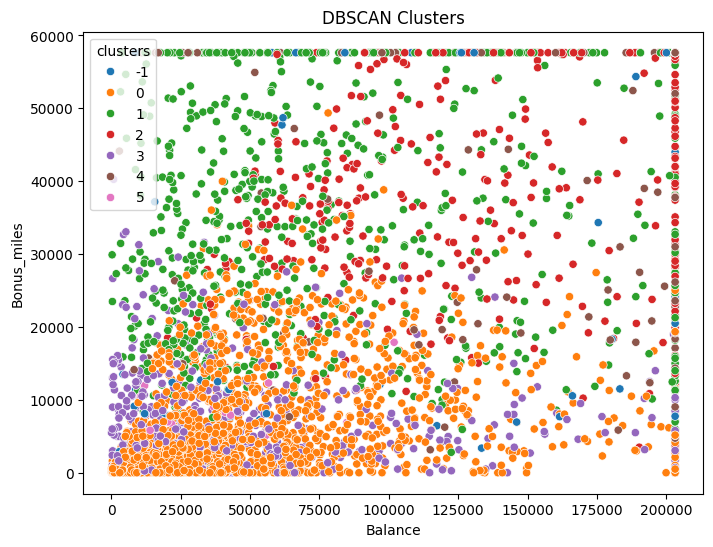

In [291]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Balance'], y=df['Bonus_miles'], hue=df['clusters'], palette='tab10')
plt.title("DBSCAN Clusters")
plt.show()


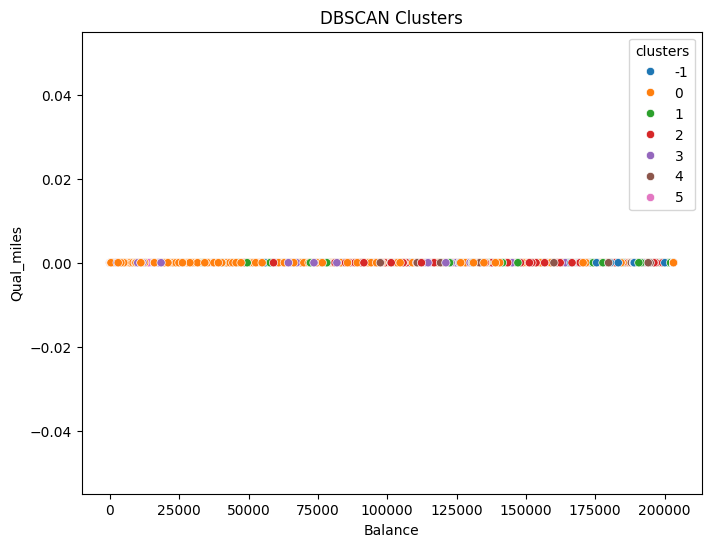

In [292]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Balance'], y=df['Qual_miles'], hue=df['clusters'], palette='tab10')
plt.title("DBSCAN Clusters")
plt.show()


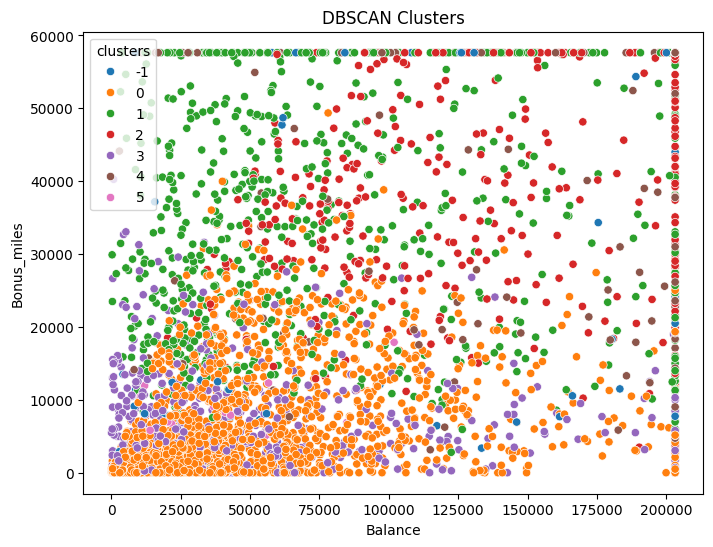

In [294]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Balance'], y=df['Bonus_miles'], hue=df['clusters'], palette='tab10')
plt.title("DBSCAN Clusters")
plt.show()


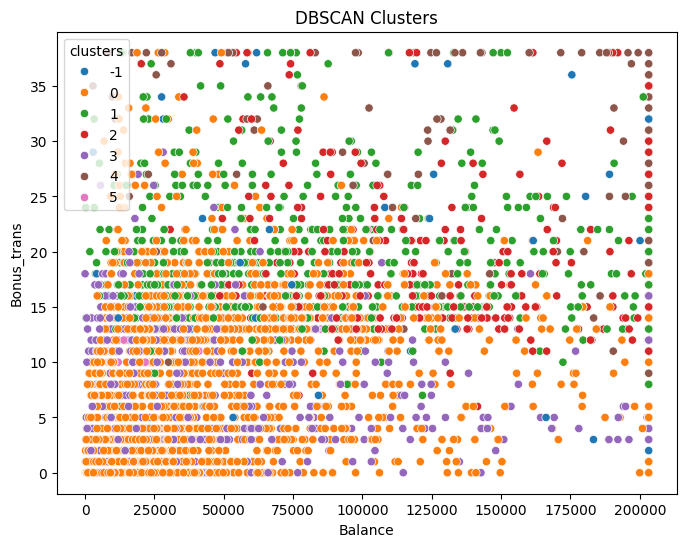

In [295]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Balance'], y=df['Bonus_trans'], hue=df['clusters'], palette='tab10')
plt.title("DBSCAN Clusters")
plt.show()

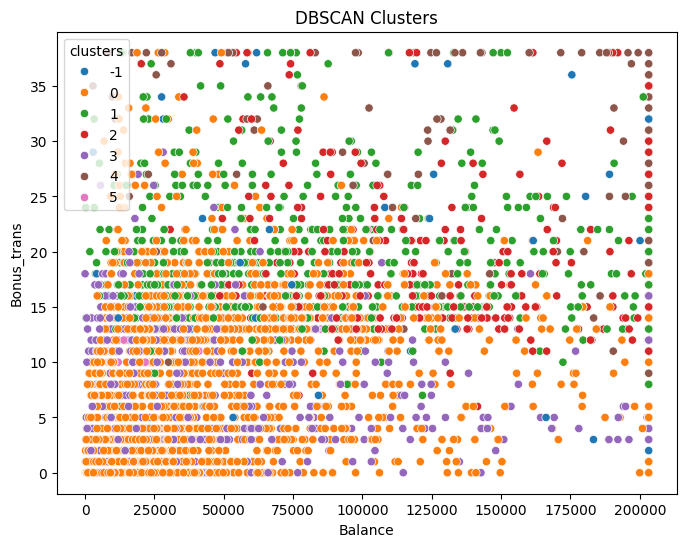

In [296]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Balance'], y=df['Bonus_trans'], hue=df['clusters'], palette='tab10')
plt.title("DBSCAN Clusters")
plt.show()

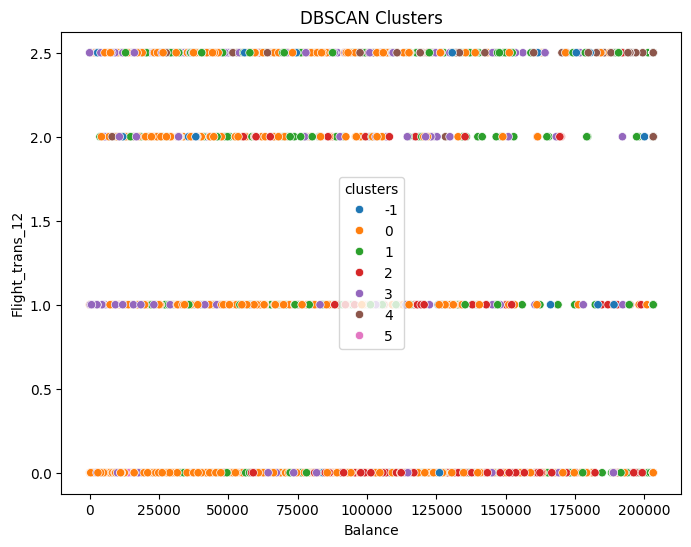

In [297]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Balance'], y=df['Flight_trans_12'], hue=df['clusters'], palette='tab10')
plt.title("DBSCAN Clusters")
plt.show()

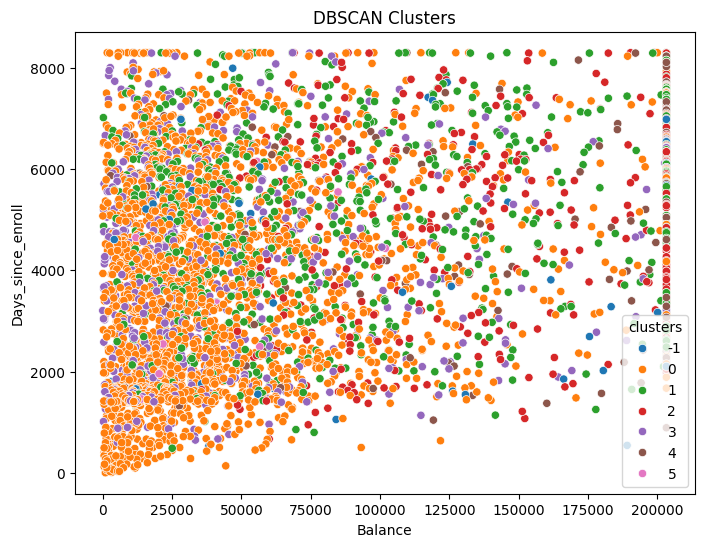

In [298]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Balance'], y=df['Days_since_enroll'], hue=df['clusters'], palette='tab10')
plt.title("DBSCAN Clusters")
plt.show()

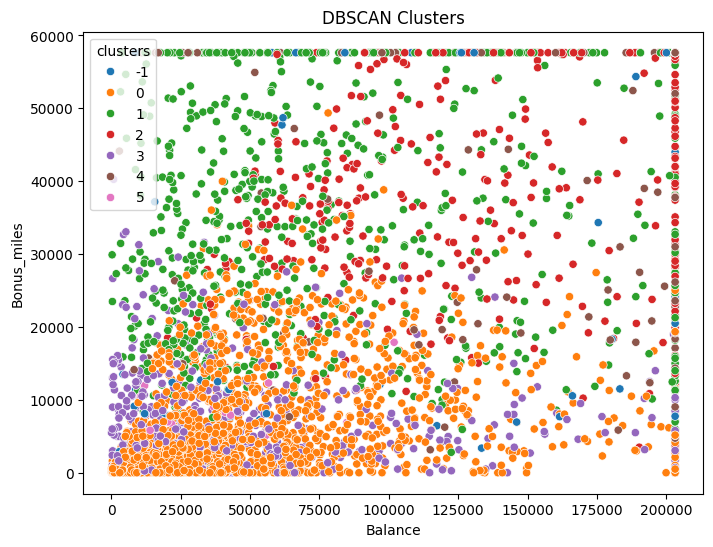

In [305]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Balance'], y=df['Bonus_miles'], hue=df['clusters'], palette='tab10')
plt.title("DBSCAN Clusters")
plt.show()

In [222]:
clusterss=kmeans.fit(featss)

In [223]:
np.unique(clusterss.labels_)

array([0, 1], dtype=int32)

In [224]:
sil_scores_kn=silhouette_score(featss,clusterss.labels_)

In [225]:
sil_scores_kn

0.36929970641472215

In [226]:
df["clusterss"]=clusterss.labels_

In [227]:
df[df.clusters==3]

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
7        8  20856.0         0.0          1        1.0        1.0       5250.0   
17      18  13958.0         0.0          1        1.0        1.0       4291.0   
19      20  23354.0         0.0          3        1.0        1.0      10447.0   
29      30  19221.0         0.0          1        1.0        1.0       4655.0   
36      37  23193.0         0.0          1        1.0        1.0        650.0   
...    ...      ...         ...        ...        ...        ...          ...   
3987  4010  11933.0         0.0          1        1.0        1.0        249.0   
3989  4012   2622.0         0.0          1        1.0        1.0       1625.0   
3994  4017  18476.0         0.0          1        1.0        1.0       8525.0   
3995  4018  64385.0         0.0          1        1.0        1.0        981.0   
3996  4019  73597.0         0.0          3        1.0        1.0      25447.0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
7             4.0              250.0              1.0               6938   
17            5.0                0.0              0.0               6905   
19            5.0                0.0              0.0               6896   
29            8.0              500.0              1.0               7896   
36            4.0              550.0              2.5               7861   
...           ...                ...              ...                ...   
3987          3.0               79.0              1.0               1412   
3989          6.0                0.0              0.0               1404   
3994          4.0              200.0              1.0               1403   
3995          5.0                0.0              0.0               1395   
3996          8.0                0.0              0.0               1402   

      Award?  clusters  clusterss  
7          1         3          1  
17         1         3          1  
19         1         3          1  
29         1         3          1  
36         1         3          1  
...      ...       ...        ...  
3987       1         3          1  
3989       1         3          1  
3994       1         3          1  
3995       1         3          1  
3996       1         3          1  

[552 rows x 14 columns]

In [228]:
#elbow curves for chosing k clusters
scores=[]
ran=range(2,12)
for k in ran:
    kmeans=KMeans(n_clusters=k,random_state=50)
    labels=kmeans.fit_predict(featss)
    si_scores=silhouette_score(featss,labels)
    scores.append(si_scores)
    print(f"k = {k} ,silhouette = {si_scores:.4f}")



k = 2 ,silhouette = 0.3693
k = 3 ,silhouette = 0.3566
k = 4 ,silhouette = 0.3079
k = 5 ,silhouette = 0.3106
k = 6 ,silhouette = 0.2413
k = 7 ,silhouette = 0.2501
k = 8 ,silhouette = 0.2911
k = 9 ,silhouette = 0.2989
k = 10 ,silhouette = 0.3006
k = 11 ,silhouette = 0.2918


In [229]:
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1  28143.0         0.0          1        1.0        1.0        174.0   
1        2  19244.0         0.0          1        1.0        1.0        215.0   
2        3  41354.0         0.0          1        1.0        1.0       4123.0   
3        4  14776.0         0.0          1        1.0        1.0        500.0   
4        5  97752.0         0.0          4        1.0        1.0      43300.0   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017  18476.0         0.0          1        1.0        1.0       8525.0   
3995  4018  64385.0         0.0          1        1.0        1.0        981.0   
3996  4019  73597.0         0.0          3        1.0        1.0      25447.0   
3997  4020  54899.0         0.0          1        1.0        1.0        500.0   
3998  4021   3016.0         0.0          1        1.0        1.0          0.0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0             1.0                0.0              0.0               7000   
1             2.0                0.0              0.0               6968   
2             4.0                0.0              0.0               7034   
3             1.0                0.0              0.0               6952   
4            26.0              777.5              2.5               6935   
...           ...                ...              ...                ...   
3994          4.0              200.0              1.0               1403   
3995          5.0                0.0              0.0               1395   
3996          8.0                0.0              0.0               1402   
3997          1.0              500.0              1.0               1401   
3998          0.0                0.0              0.0               1398   

      Award?  clusters  clusterss  
0          0         0          1  
1          0         0          1  
2          0         0          1  
3          0         0          1  
4          1         1          0  
...      ...       ...        ...  
3994       1         3          1  
3995       1         3          1  
3996       1         3          1  
3997       0         0          1  
3998       0         0          1  

[3999 rows x 14 columns]

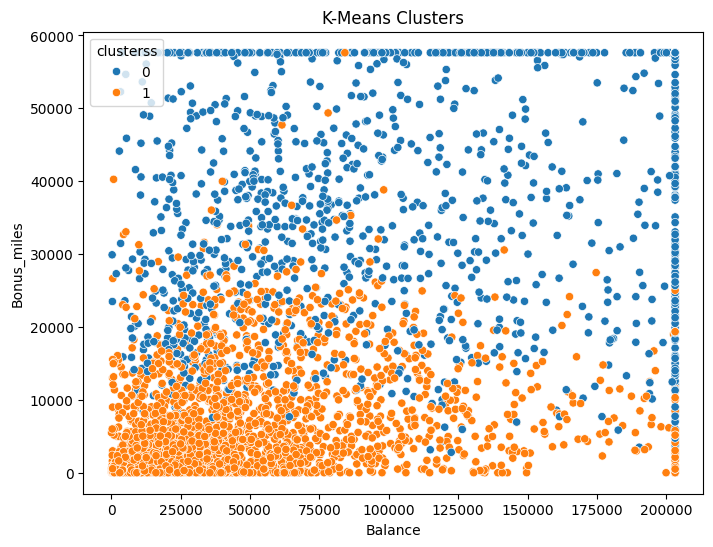

In [237]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Balance'], y=df['Bonus_miles'], hue=df['clusterss'], palette='tab10')
plt.title("K-Means Clusters")
plt.show()


In [239]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?', 'clusters', 'clusterss'],
      dtype='object')

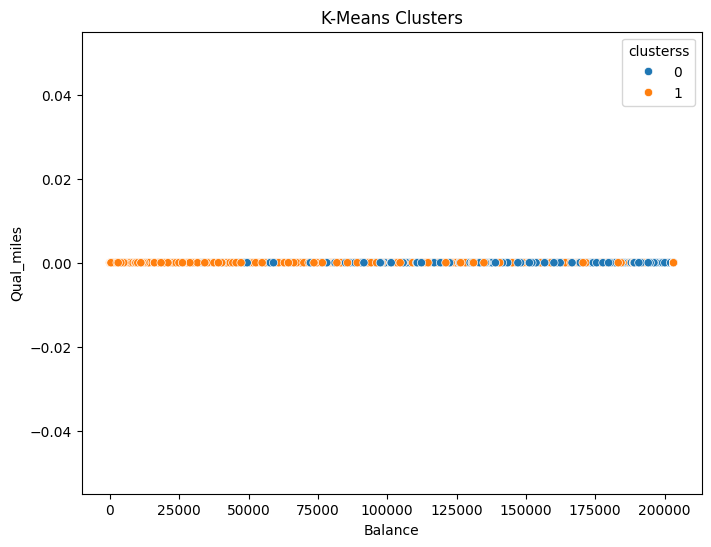

In [240]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Balance'], y=df['Qual_miles'], hue=df['clusterss'], palette='tab10')
plt.title("K-Means Clusters")
plt.show()


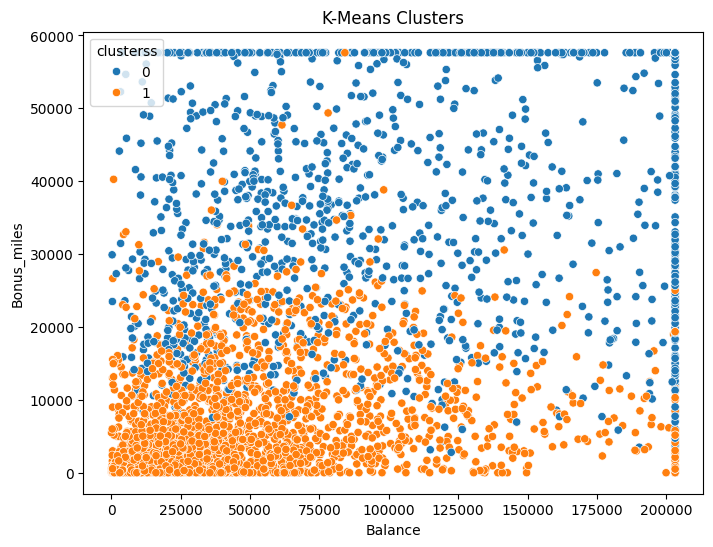

In [241]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Balance'], y=df['Bonus_miles'], hue=df['clusterss'], palette='tab10')
plt.title("K-Means Clusters")
plt.show()


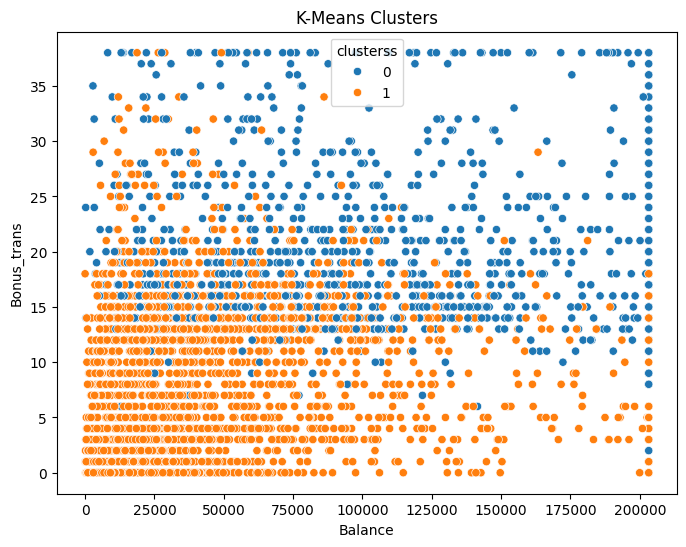

In [242]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Balance'], y=df['Bonus_trans'], hue=df['clusterss'], palette='tab10')
plt.title("K-Means Clusters")
plt.show()


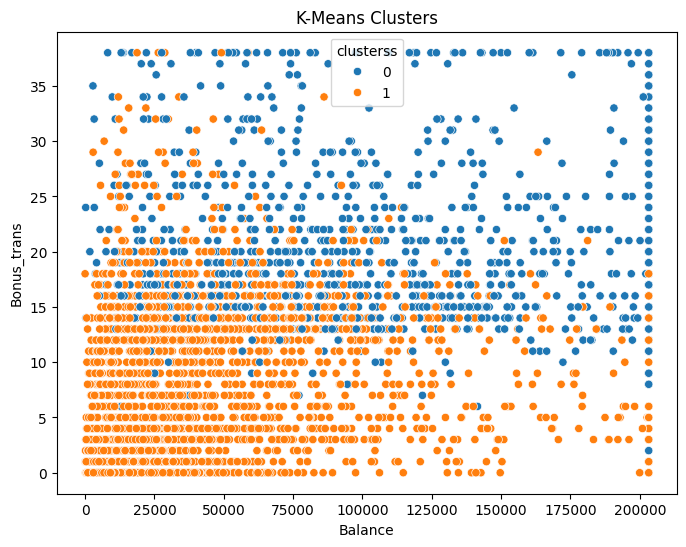

In [248]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Balance'], y=df['Bonus_trans'], hue=df['clusterss'], palette='tab10')
plt.title("K-Means Clusters")
plt.show()


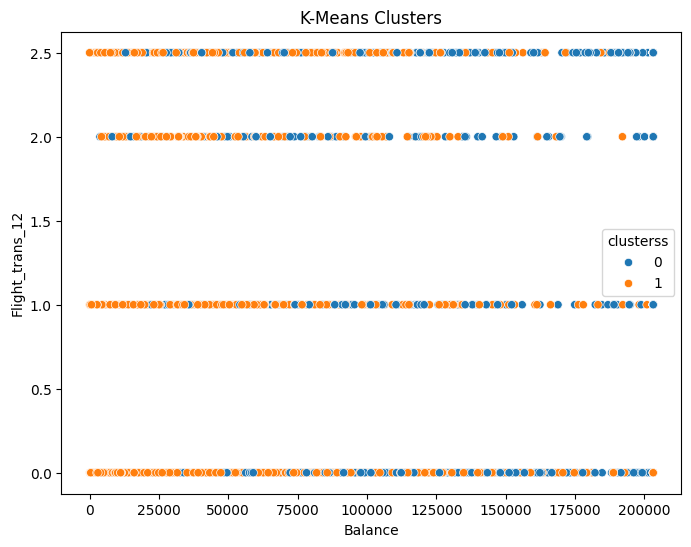

In [247]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Balance'], y=df['Flight_trans_12'], hue=df['clusterss'], palette='tab10')
plt.title("K-Means Clusters")
plt.show()


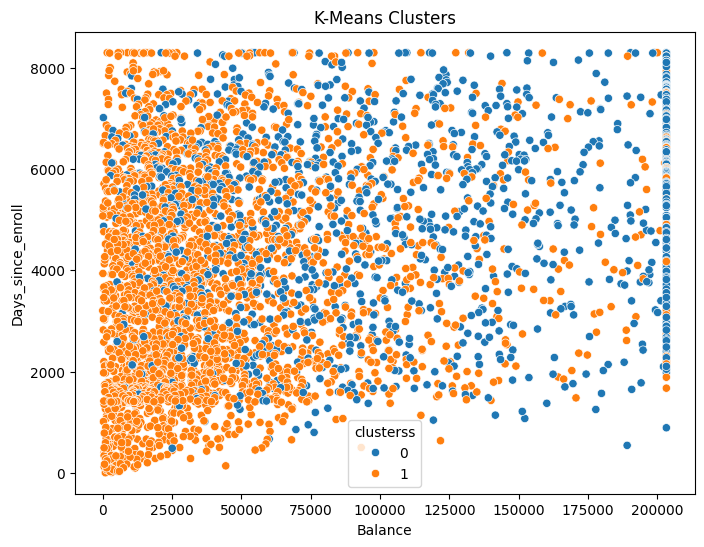

In [246]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Balance'], y=df['Days_since_enroll'], hue=df['clusterss'], palette='tab10')
plt.title("K-Means Clusters")
plt.show()


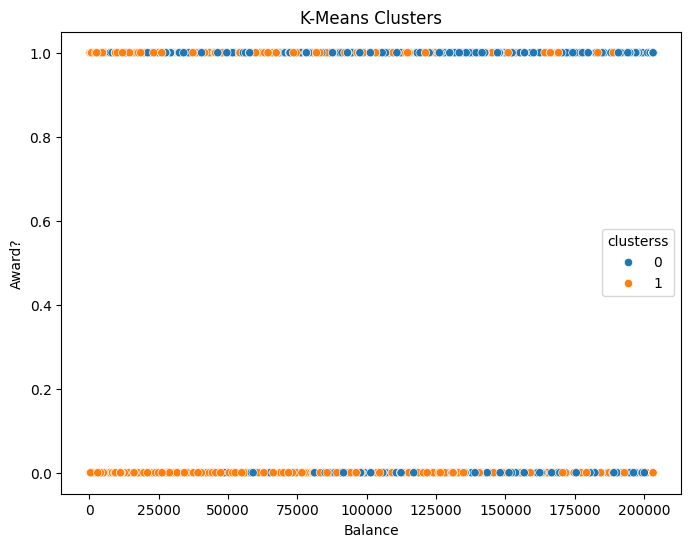

In [250]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Balance'], y=df['Award?'], hue=df['clusterss'], palette='tab10')
plt.title("K-Means Clusters")
plt.show()
